# Security Analysis for Book My Show

##**Importing Packages and Installations**

In [1]:
!pip install pandas-profiling
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
Data = pd.read_csv("dataset.csv")

In [3]:
# Profile=ProfileReport(DataX
# Profile.to_file("EDA_BookMyShow.html")

In [4]:
Data

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

##Exploratory Data Analysis

In [6]:
Data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

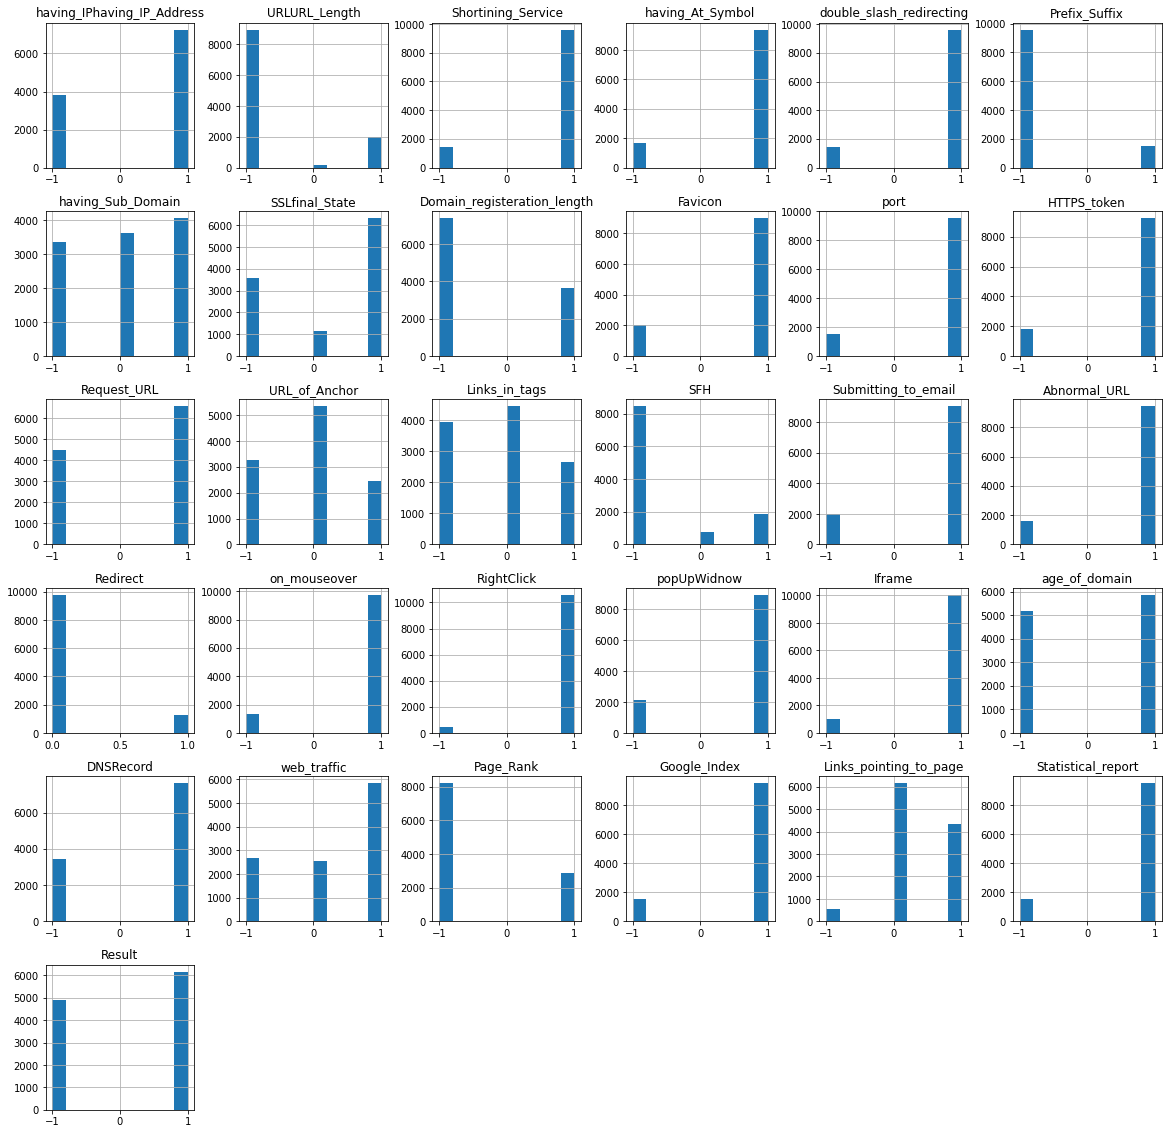

In [142]:
Data_new=Data.iloc[:,1:]
Data_new.hist(figsize=(20,20))
plt.show()

In [143]:
pieces = []
for col in Data_new.columns:
    tmp_series = Data_new[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
df_value_counts = pd.concat(pieces, axis=1)
df_value_counts

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
-1,3793.0,8960,1444.0,1655.0,1429.0,9590.0,3363,3557,7389.0,2053.0,1502.0,1796.0,4495.0,3282,3956,8440,2014.0,1629.0,NaN,1315.0,476.0,2137.0,1012.0,5189.0,3443.0,2655,8201.0,1539.0,548,1550.0,4898.0
0,NaN,135,NaN,NaN,NaN,NaN,3622,1167,NaN,NaN,NaN,NaN,NaN,5337,4449,761,NaN,NaN,9776.0,NaN,NaN,NaN,NaN,NaN,NaN,2569,NaN,NaN,6156,NaN,NaN
1,7262.0,1960,9611.0,9400.0,9626.0,1465.0,4070,6331,3666.0,9002.0,9553.0,9259.0,6560.0,2436,2650,1854,9041.0,9426.0,1279.0,9740.0,10579.0,8918.0,10043.0,5866.0,7612.0,5831,2854.0,9516.0,4351,9505.0,6157.0


In [144]:
transposed_DataFrame = df_value_counts.T
transposed_DataFrame

,-1,0,1
having_IPhaving_IP_Address,3793.0,NaN,7262.0
URLURL_Length,8960.0,135.0,1960.0
Shortining_Service,1444.0,NaN,9611.0
having_At_Symbol,1655.0,NaN,9400.0
double_slash_redirecting,1429.0,NaN,9626.0
Prefix_Suffix,9590.0,NaN,1465.0
having_Sub_Domain,3363.0,3622.0,4070.0
SSLfinal_State,3557.0,1167.0,6331.0
Domain_registeration_length,7389.0,NaN,3666.0
Favicon,2053.0,NaN,9002.0


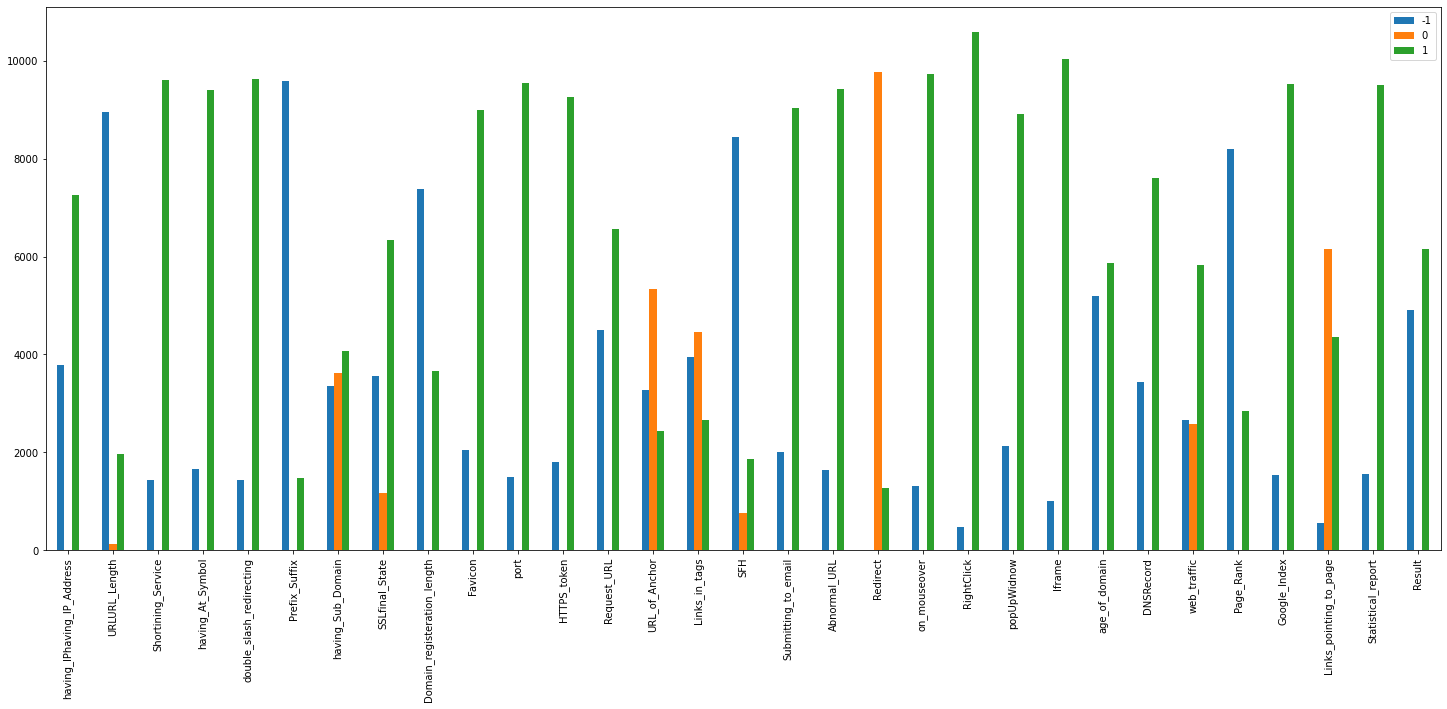

In [145]:
transposed_DataFrame.plot(kind="bar",stacked = False, figsize = (25,10))

In [146]:
for cols in Data_new.columns:
    print("Feature {0} Unique Value {1}".format(cols,Data_new[cols].unique()))

Feature having_IPhaving_IP_Address Unique Value [-1  1]
Feature URLURL_Length Unique Value [ 1  0 -1]
Feature Shortining_Service Unique Value [ 1 -1]
Feature having_At_Symbol Unique Value [ 1 -1]
Feature double_slash_redirecting Unique Value [-1  1]
Feature Prefix_Suffix Unique Value [-1  1]
Feature having_Sub_Domain Unique Value [-1  0  1]
Feature SSLfinal_State Unique Value [-1  1  0]
Feature Domain_registeration_length Unique Value [-1  1]
Feature Favicon Unique Value [ 1 -1]
Feature port Unique Value [ 1 -1]
Feature HTTPS_token Unique Value [-1  1]
Feature Request_URL Unique Value [ 1 -1]
Feature URL_of_Anchor Unique Value [-1  0  1]
Feature Links_in_tags Unique Value [ 1 -1  0]
Feature SFH Unique Value [-1  1  0]
Feature Submitting_to_email Unique Value [-1  1]
Feature Abnormal_URL Unique Value [-1  1]
Feature Redirect Unique Value [0 1]
Feature on_mouseover Unique Value [ 1 -1]
Feature RightClick Unique Value [ 1 -1]
Feature popUpWidnow Unique Value [ 1 -1]
Feature Iframe Unique 

In [147]:
x = Data_new.iloc[:,:-1]
y = Data_new[["Result"]]

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3,random_state=0)


###Model Based feature Selection

In [149]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train.iloc[:,:], Y_train["Result"])
imp_features=[]
for name, importance in zip(X_train.columns, rnd_clf.feature_importances_):
  print(name, "=", importance)
  imp_features.append(name)
imp_features=imp_features[:25]

having_IPhaving_IP_Address = 0.013335752442707896
URLURL_Length = 0.008700672571092099
Shortining_Service = 0.0050726495540183575
having_At_Symbol = 0.005177975450940538
double_slash_redirecting = 0.003868304709078982
Prefix_Suffix = 0.0417949969392759
having_Sub_Domain = 0.063472112242371
SSLfinal_State = 0.31234987810117054
Domain_registeration_length = 0.016784861388425637
Favicon = 0.004077123382455876
port = 0.0026064719723628473
HTTPS_token = 0.006586811395071793
Request_URL = 0.019678141130546462
URL_of_Anchor = 0.254795274850351
Links_in_tags = 0.0454307842787233
SFH = 0.020569169176128
Submitting_to_email = 0.005213689374452933
Abnormal_URL = 0.004699309099968696
Redirect = 0.005464563696571197
on_mouseover = 0.00363281125913016
RightClick = 0.001196360880112262
popUpWidnow = 0.004947039510346216
Iframe = 0.002300509840669968
age_of_domain = 0.016510623510880406
DNSRecord = 0.012742589847630301
web_traffic = 0.06944965552370858
Page_Rank = 0.012199462108606717
Google_Index = 0

In [150]:
df_skb=X_train[imp_features]
df_test_skb=X_test[imp_features]

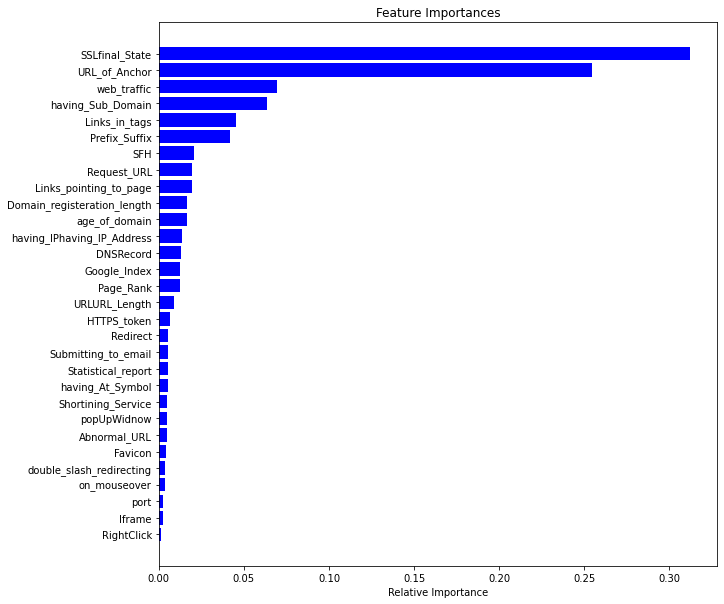

In [151]:
features = X_train.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Correlation


In [152]:
X_train.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,1.000000,-0.042466,0.396964,0.169899,0.399749,-0.002837,-0.086450,0.078216,-0.032140,0.096087,0.071926,0.368209,0.035998,0.102460,0.009505,-0.006408,0.085619,0.340421,-0.319388,0.095767,0.052827,0.107862,0.067242,-0.002700,-0.055043,0.010630,-0.090139,0.024051,-0.337380,-0.016743
URLURL_Length,-0.042466,1.000000,-0.093867,-0.083038,-0.073684,0.062739,0.003857,0.050605,-0.216808,-0.045271,-0.004373,-0.089016,0.244078,-0.020329,0.051464,0.428554,-0.022045,-0.105512,0.045734,-0.049788,-0.024922,-0.048333,-0.015666,0.170538,-0.041767,0.013378,0.174463,0.004363,-0.017459,-0.069528
Shortining_Service,0.396964,-0.093867,1.000000,0.108659,0.839913,-0.075526,-0.040934,-0.054625,0.056783,0.005158,0.006836,0.758777,-0.034317,0.004645,-0.130238,-0.017382,0.049556,0.747411,-0.542511,0.065482,0.042440,0.037695,0.022072,-0.051764,0.440839,-0.048750,0.018782,0.162433,-0.199955,0.094469
having_At_Symbol,0.169899,-0.083038,0.108659,1.000000,0.087598,-0.009416,-0.067031,0.028233,0.016305,0.312147,0.368990,0.108236,0.023813,0.058736,-0.062472,-0.023699,0.370334,0.199105,-0.031849,0.287377,0.222091,0.298824,0.284824,-0.002795,-0.049880,0.040859,-0.064220,0.036157,-0.008487,-0.079721
double_slash_redirecting,0.399749,-0.073684,0.839913,0.087598,1.000000,-0.081525,-0.035632,-0.030744,0.044976,0.032374,0.028102,0.760612,-0.021700,-0.004750,-0.118057,-0.035729,0.039242,0.733808,-0.609524,0.085726,0.028214,0.052979,0.016555,-0.051340,0.431973,-0.071850,0.003841,0.188742,-0.194429,0.075228
Prefix_Suffix,-0.002837,0.062739,-0.075526,-0.009416,-0.081525,1.000000,0.082480,0.260319,-0.094077,-0.016144,-0.030072,-0.065794,0.100078,0.347866,0.098918,0.001190,-0.046521,-0.075377,0.014392,0.005522,-0.033029,-0.022092,-0.041568,0.072256,-0.026124,0.115557,-0.006624,0.067815,0.070610,0.000440
having_Sub_Domain,-0.086450,0.003857,-0.040934,-0.067031,-0.035632,0.082480,1.000000,0.269421,-0.081895,-0.017853,0.007806,-0.038243,0.102623,0.230986,0.092321,0.099751,0.005273,-0.036562,0.022954,-0.021930,0.015341,-0.030283,0.001972,0.121904,0.124489,-0.011804,0.117757,0.050238,-0.007800,0.087513
SSLfinal_State,0.078216,0.050605,-0.054625,0.028233,-0.030744,0.260319,0.269421,1.000000,-0.188058,-0.024428,0.018780,-0.028224,0.189238,0.531851,0.175883,0.173353,0.007930,-0.047791,-0.023437,0.014517,0.016577,-0.020750,-0.005113,0.168034,0.046204,0.252706,0.076930,0.093488,-0.009306,0.062083
Domain_registeration_length,-0.032140,-0.216808,0.056783,0.016305,0.044976,-0.094077,-0.081895,-0.188058,1.000000,0.059538,0.023506,0.056429,-0.613194,-0.158384,-0.104348,-0.133264,0.039327,0.055707,-0.016916,0.028880,0.024190,0.054897,0.004056,-0.063217,0.000743,-0.124682,-0.050016,-0.035944,0.118277,0.001026
Favicon,0.096087,-0.045271,0.005158,0.312147,0.032374,-0.016144,-0.017853,-0.024428,0.059538,1.000000,0.813541,0.044373,-0.006676,0.033394,-0.108244,-0.018077,0.682978,0.073945,-0.017651,0.713646,0.427273,0.938500,0.638617,-0.009182,0.087850,-0.050340,0.003122,-0.017776,-0.141736,0.303707


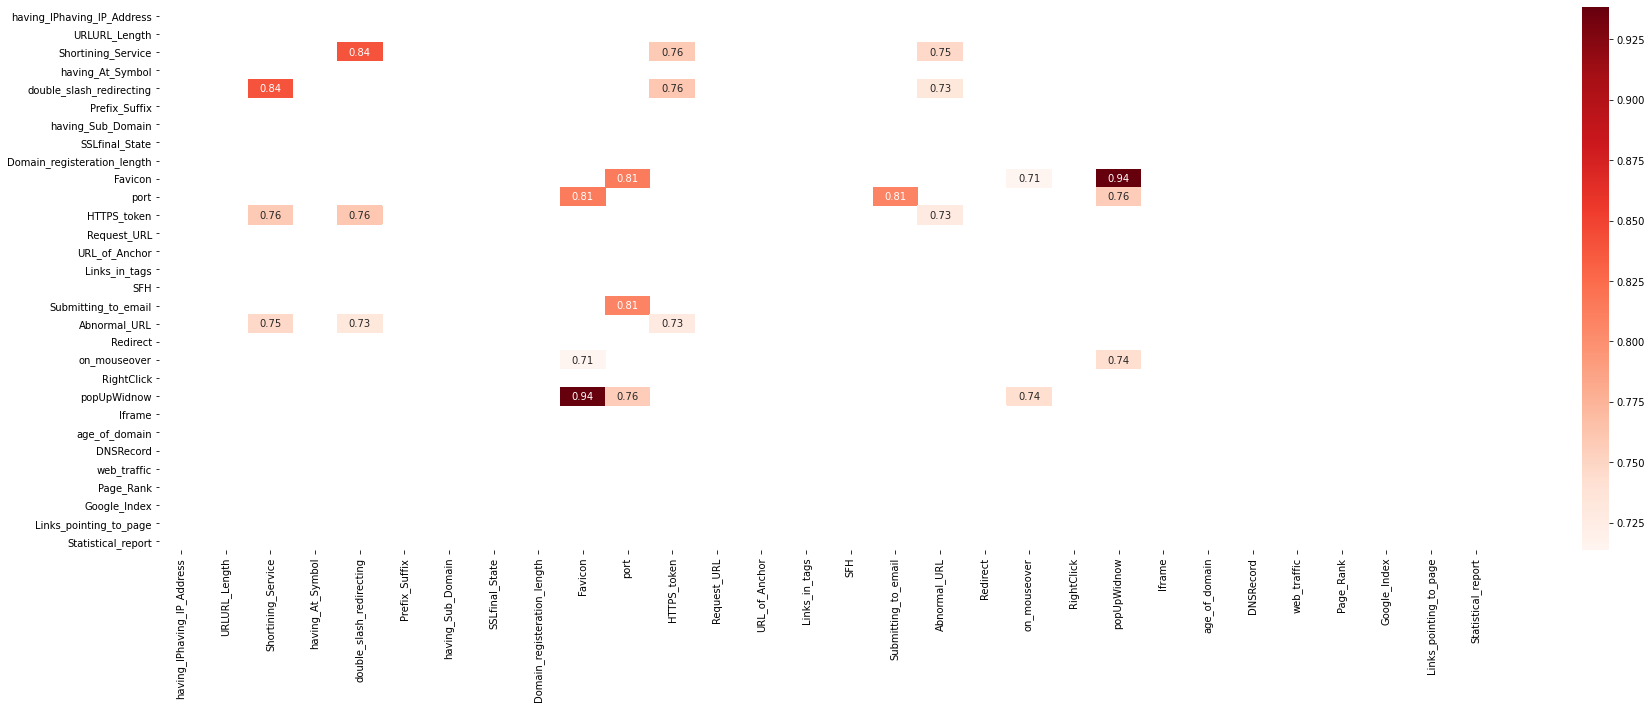

In [153]:
dfCorr = X_train.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [155]:
columns=np.full((dfCorr.shape[0],), True, dtype=bool)
for i in range(dfCorr.shape[0]):
  for j in range(i+1,dfCorr.shape[0]):
    if dfCorr.iloc[i,j]>=0.7:
      if columns[j]:
        columns[j] = False
corr_columns=X_train.columns[columns]
X_train=X_train[corr_columns]
X_train

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Redirect,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
9491,-1,-1,1,1,1,-1,1,1,1,-1,1,-1,-1,0,1,1,1,1,1,-1,1,1,1
7795,1,-1,1,1,-1,1,1,-1,1,1,0,1,-1,0,1,1,-1,1,0,1,1,-1,1
6577,-1,-1,1,1,-1,0,-1,1,1,-1,0,0,-1,0,1,1,-1,1,0,1,1,1,1
4804,1,-1,1,1,-1,-1,-1,-1,-1,1,0,1,-1,0,1,-1,1,1,0,-1,1,1,-1
3812,1,-1,1,1,-1,0,-1,-1,1,1,-1,-1,-1,0,1,1,-1,-1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,-1,1,1,-1,1,1,-1,1,1,1,0,-1,0,1,1,1,-1,-1,-1,1,1,1
3264,1,-1,1,1,-1,-1,-1,1,1,1,0,0,-1,0,1,1,1,-1,1,-1,-1,1,1
9845,-1,1,1,1,-1,1,1,-1,1,1,1,0,-1,0,1,1,1,1,0,1,1,1,1
10799,-1,-1,1,1,-1,-1,0,-1,1,1,-1,-1,-1,0,1,1,1,1,0,-1,1,1,1


In [156]:
df_skb=X_train
df_skb

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Redirect,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
9491,-1,-1,1,1,1,-1,1,1,1,-1,1,-1,-1,0,1,1,1,1,1,-1,1,1,1
7795,1,-1,1,1,-1,1,1,-1,1,1,0,1,-1,0,1,1,-1,1,0,1,1,-1,1
6577,-1,-1,1,1,-1,0,-1,1,1,-1,0,0,-1,0,1,1,-1,1,0,1,1,1,1
4804,1,-1,1,1,-1,-1,-1,-1,-1,1,0,1,-1,0,1,-1,1,1,0,-1,1,1,-1
3812,1,-1,1,1,-1,0,-1,-1,1,1,-1,-1,-1,0,1,1,-1,-1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,-1,1,1,-1,1,1,-1,1,1,1,0,-1,0,1,1,1,-1,-1,-1,1,1,1
3264,1,-1,1,1,-1,-1,-1,1,1,1,0,0,-1,0,1,1,1,-1,1,-1,-1,1,1
9845,-1,1,1,1,-1,1,1,-1,1,1,1,0,-1,0,1,1,1,1,0,1,1,1,1
10799,-1,-1,1,1,-1,-1,0,-1,1,1,-1,-1,-1,0,1,1,1,1,0,-1,1,1,1


In [157]:
df_test_skb=X_test[corr_columns]
df_test_skb

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Redirect,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
226,1,-1,1,1,-1,-1,1,1,-1,-1,-1,0,-1,0,1,1,-1,-1,-1,-1,1,0,1
2252,1,-1,1,1,-1,0,-1,-1,1,1,-1,0,-1,0,1,1,-1,1,-1,-1,1,0,1
2646,1,-1,1,1,-1,0,1,-1,1,1,0,-1,-1,0,1,1,1,-1,1,-1,1,1,1
6444,1,-1,1,1,-1,0,-1,-1,1,-1,0,-1,-1,1,1,1,-1,1,1,-1,1,0,1
1387,1,-1,1,1,-1,0,1,-1,1,1,0,-1,-1,0,1,1,-1,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,1,-1,1,-1,-1,1,0,1,-1,-1,0,0,0,1,-1,-1,-1,1,-1,-1,1,0,1
6964,-1,-1,1,1,-1,1,1,-1,-1,1,0,-1,-1,0,1,1,-1,1,1,1,1,0,1
3980,1,-1,1,1,-1,0,0,-1,1,1,-1,0,-1,0,1,1,1,-1,0,-1,1,0,1
3771,1,1,1,1,-1,1,1,-1,-1,1,0,1,1,0,-1,-1,1,1,0,-1,1,1,-1


In [158]:
f_train=df_skb.values
l_train=Y_train.values.ravel()
f_test=df_test_skb.values
l_test=Y_test.values.ravel()

##Model Implementation

###Random Forest

In [205]:
rf = RandomForestClassifier()
rf.fit(f_train, l_train)
rf.score(f_test,l_test)

0.9674404582454025

In [177]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 32,
 'verbose': 0,
 'warm_start': False}


### Hyperparameter Tuning for RF (RandomSearchCV)

In [178]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 7, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 3, 3, 4, 4, 5, 5, 6, 6, 7, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [50, 87, 125, 162, 200]}


In [179]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(f_train, l_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [180]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 125}

In [218]:
rf_random = RandomForestClassifier(bootstrap= False, 
                            max_depth= None,
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split = 3,
                            n_estimators = 125 )
rf_random.fit(f_train, l_train)
rf_random.score(f_test,l_test)

0.967741935483871

###Decision Tree

In [184]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(f_train, l_train)
dt.score(f_test,l_test)

0.962315345191438

###Logistic Regression

In [185]:
lr = LogisticRegression()
lr.fit(f_train, l_train)
lr.score(f_test,l_test)

0.9237262586674706

###Support Vector Machines

In [186]:
svm = SVC(probability=True)
svm.fit(f_train,l_train)
svm.score(f_test,l_test)

0.9421163702140488

###K Nearest Neighbors

In [187]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(f_train,l_train)
kn.score(f_test,l_test)

0.9442267108833283

###Gradient Boosting

In [188]:
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3,random_state=10)
gb.fit(f_train,l_train)
gb.score(f_test,l_test)

0.9448296653602652

##Plotting ROC-AUC Curve

In [189]:
r_probs = [0 for _ in range(len(l_test))]
rf_probs = rf.predict_proba(f_test)
dt_probs = dt.predict_proba(f_test)
lr_probs = lr.predict_proba(f_test)
kn_probs = kn.predict_proba(f_test)
gb_probs = gb.predict_proba(f_test)
sv_probs = svm.predict_proba(f_test)

In [190]:
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
kn_probs = kn_probs[:, 1]
gb_probs = gb_probs[:, 1]
sv_probs = sv_probs[:, 1]

In [191]:
r_auc = roc_auc_score(l_test, r_probs)
rf_auc = roc_auc_score(l_test, rf_probs)
dt_auc = roc_auc_score(l_test, dt_probs)
lr_auc = roc_auc_score(l_test, lr_probs)
kn_auc = roc_auc_score(l_test, kn_probs)
gb_auc = roc_auc_score(l_test, gb_probs)
sv_auc = roc_auc_score(l_test, sv_probs)

In [192]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('KNN: AUROC = %.3f' % (kn_auc))
print('Gradient Boosting: AUROC = %.3f' % (gb_auc))
print('SVC: AUROC = %.3f' % (sv_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.994
Decision Tree: AUROC = 0.974
Logistic Regression: AUROC = 0.977
KNN: AUROC = 0.976
Gradient Boosting: AUROC = 0.989
SVC: AUROC = 0.987


In [193]:
r_fpr, r_tpr, _ = roc_curve(l_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(l_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(l_test, dt_probs)
lr_fpr, lr_tpr,_ = roc_curve(l_test, lr_probs)
kn_fpr, kn_tpr,_ = roc_curve(l_test, kn_probs)
gb_fpr, gb_tpr,_ = roc_curve(l_test, gb_probs)
sv_fpr, sv_tpr,_ = roc_curve(l_test, sv_probs)

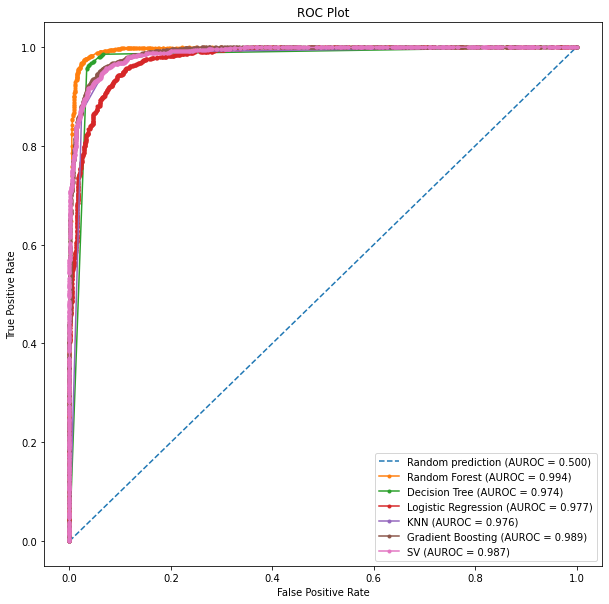

In [194]:
plt.figure(figsize=(10, 10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % kn_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='SV (AUROC = %0.3f)' % sv_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

##K fold Cross-Validation (K=10, split= "Stratified")

In [211]:
def KFold_Validation(model,features,target):
    skfold = StratifiedKFold(n_splits = 10)
    results = cross_val_score(model,features,target,cv = skfold)
    #print("Accuracy for model {} is {} by using K-Fold cross-validation technique".format(model,results.mean()))
    return results.mean()
    

In [214]:
dict ={
       rf:'RandomForestClassifier(bootstrap= False,max_depth= None,max_features=sqrt,min_samples_leaf= 1,min_samples_split = 3,n_estimators = 125)',
       dt:'DecisionTreeClassifier(random_state=0)',
       lr:'LogisticRegression()',
       gb:'GradientBoostingClassifier(random_state=10)',
       kn:'KNeighborsClassifier(n_neighbors=3)',
       svm:'SVC(probability=True)'
      }
#list =[rf,dt,lr,gb,kn,svm]
list = [*dict]
kfoldModel_results=[]
model_results=[]
for l in list:
    val = KFold_Validation(l,f_train,l_train)
    value = l.score(f_test,l_test)
    model_results.append(value)
    kfoldModel_results.append(val)
# print(model_results)   
# print(kfoldModel_results)    

In [215]:
names = ['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','GradientBoostingClassifier','KNeighborsClassifier','SupportVectorClassifier']

In [216]:
Final_Data = pd.DataFrame(np.column_stack([names,model_results,kfoldModel_results ,[*dict]]), 
                               columns=['Model_names', 'Model_results', 'Model_KfoldResults',"Parameters"])
Final_Data.index = np.arange(1, len(Final_Data) + 1)
Final_Data

/usr/local/lib/python3.7/dist-packages/numpy/lib/shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = array(v, copy=False, subok=True)


,Model_names,Model_results,Model_KfoldResults,Parameters
1,RandomForestClassifier,0.96744,0.968853,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
2,DecisionTreeClassifier,0.962315,0.95774,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,LogisticRegression,0.923726,0.929049,"LogisticRegression(C=1.0, class_weight=None, d..."
4,GradientBoostingClassifier,0.94483,0.949727,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
5,KNeighborsClassifier,0.944227,0.941195,"KNeighborsClassifier(algorithm='auto', leaf_si..."
6,SupportVectorClassifier,0.942116,0.946884,"SVC(C=1.0, break_ties=False, cache_size=200, c..."


In [219]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [220]:
!pip freeze > requirements.txt